<a href="https://colab.research.google.com/github/anagabyfuentes/ProyectoIntegrador_Mermas/blob/main/Estadisticas_descriptivas%26AnalisisBiVariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Estadísticas resumidas del conjunto de datos
# Equipo 13 Mermas
import pandas as pd

# Cargar datos
df = pd.read_csv("/content/merma_bod_combinado_2022-2024.csv")  # datos bodega

# Ver estadísticas resumidas
print(df.describe(include='all'))

               Year Month Source         Producto  Etiqueta Tamaño    Color  \
count   2916.000000  2916   2916             2916      2916   2916      545   
unique          NaN    12      1               24       235     53       10   
top             NaN  Mayo    bod  Tomate Saladete  GENERICA     LG  COLOR 4   
freq            NaN   303   2916             1671       292    415      199   
mean    2023.022634   NaN    NaN              NaN       NaN    NaN      NaN   
std        0.789404   NaN    NaN              NaN       NaN    NaN      NaN   
min     2022.000000   NaN    NaN              NaN       NaN    NaN      NaN   
25%     2022.000000   NaN    NaN              NaN       NaN    NaN      NaN   
50%     2023.000000   NaN    NaN              NaN       NaN    NaN      NaN   
75%     2024.000000   NaN    NaN              NaN       NaN    NaN      NaN   
max     2024.000000   NaN    NaN              NaN       NaN    NaN      NaN   

              Cajas        Kilos  Importe_Venta  
c

In [3]:
# Estadísticas resumidas del conjunto de datos
# Equipo 13 Mermas
import pandas as pd

# Cargar datos
df = pd.read_csv("/content/merma_isla_combinado_2022-2024.csv")  # datos isla

# Ver estadísticas resumidas
print(df.describe(include='all'))

               Year      Month Source         Producto  Etiqueta Tamaño  \
count    525.000000        525    525              525       525    525   
unique          NaN         12      1                9        89     22   
top             NaN  Diciembre   isla  Tomate Saladete  GENERICA     XL   
freq            NaN         70    525              453       138    126   
mean    2023.337143        NaN    NaN              NaN       NaN    NaN   
std        0.790359        NaN    NaN              NaN       NaN    NaN   
min     2022.000000        NaN    NaN              NaN       NaN    NaN   
25%     2023.000000        NaN    NaN              NaN       NaN    NaN   
50%     2024.000000        NaN    NaN              NaN       NaN    NaN   
75%     2024.000000        NaN    NaN              NaN       NaN    NaN   
max     2024.000000        NaN    NaN              NaN       NaN    NaN   

        Color        Cajas         Kilos  Importe_Venta  
count     1.0   525.000000    525.000000 

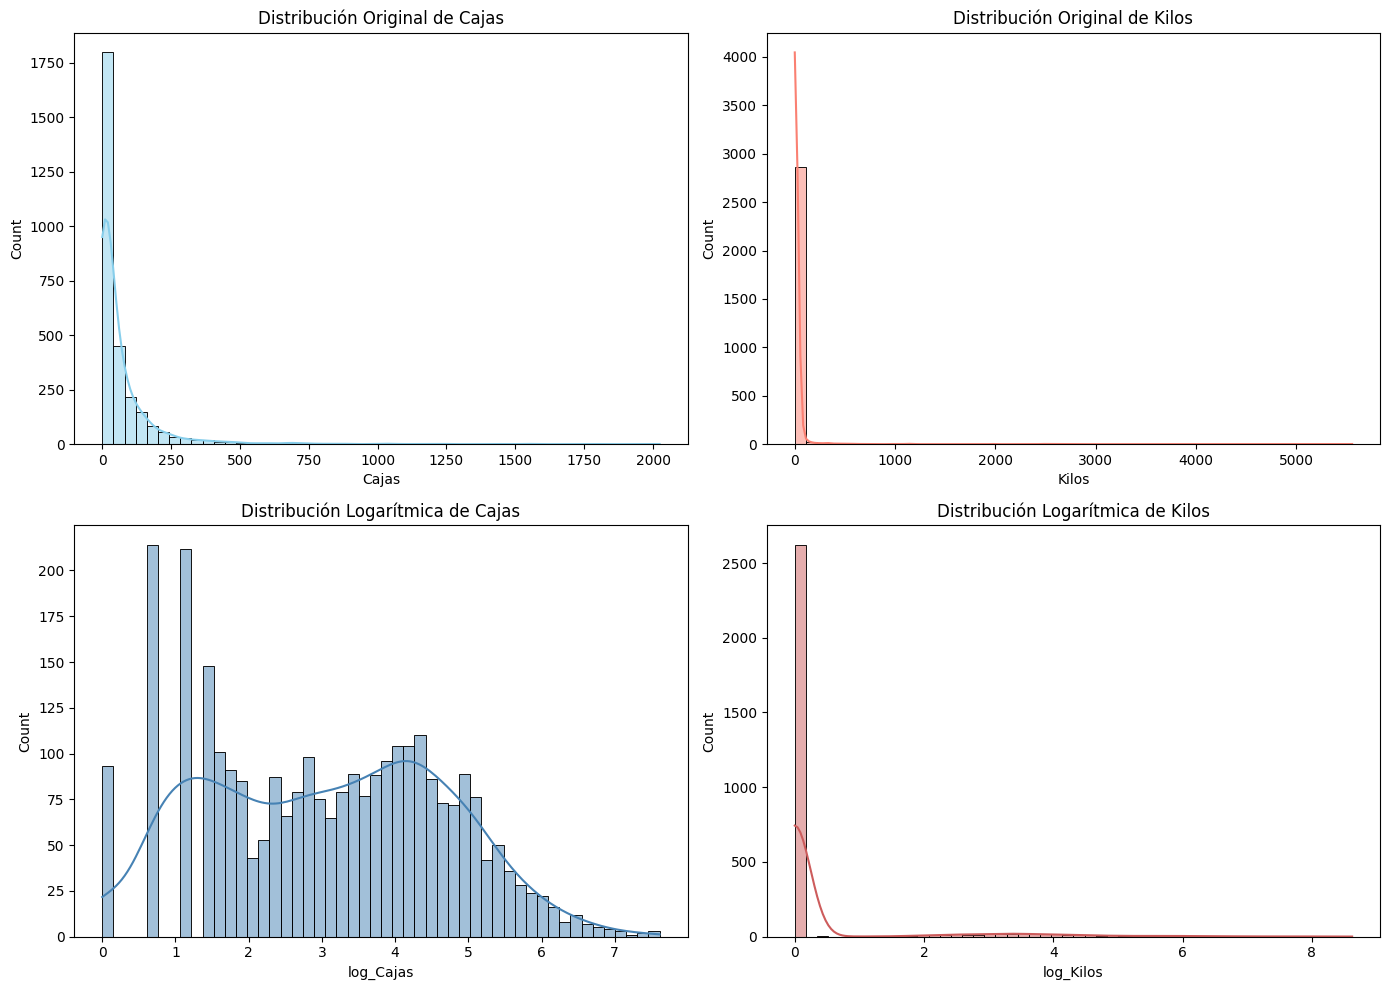

<ipython-input-14-26edbbc68f37>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')


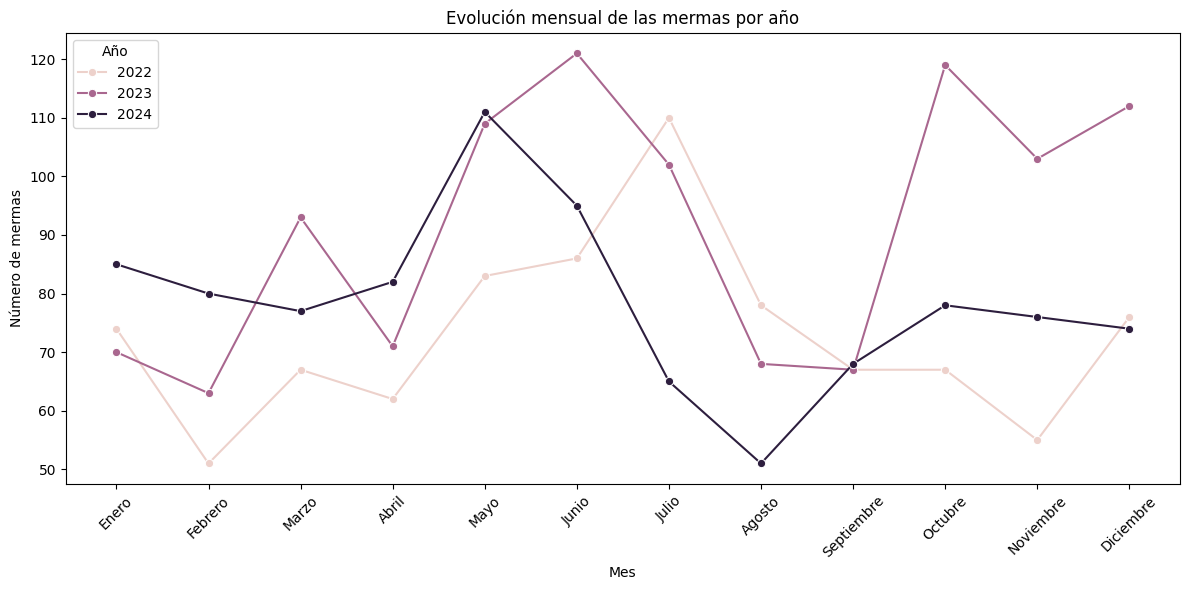

Matriz de correlación:
                   Year     Cajas     Kilos  Importe_Venta  log_Cajas  \
Year           1.000000  0.064460 -0.014462            NaN   0.101450   
Cajas          0.064460  1.000000 -0.011521            NaN   0.656482   
Kilos         -0.014462 -0.011521  1.000000            NaN  -0.002559   
Importe_Venta       NaN       NaN       NaN            NaN        NaN   
log_Cajas      0.101450  0.656482 -0.002559            NaN   1.000000   
log_Kilos      0.009417 -0.131382  0.483865            NaN  -0.317585   

               log_Kilos  
Year            0.009417  
Cajas          -0.131382  
Kilos           0.483865  
Importe_Venta        NaN  
log_Cajas      -0.317585  
log_Kilos       1.000000  


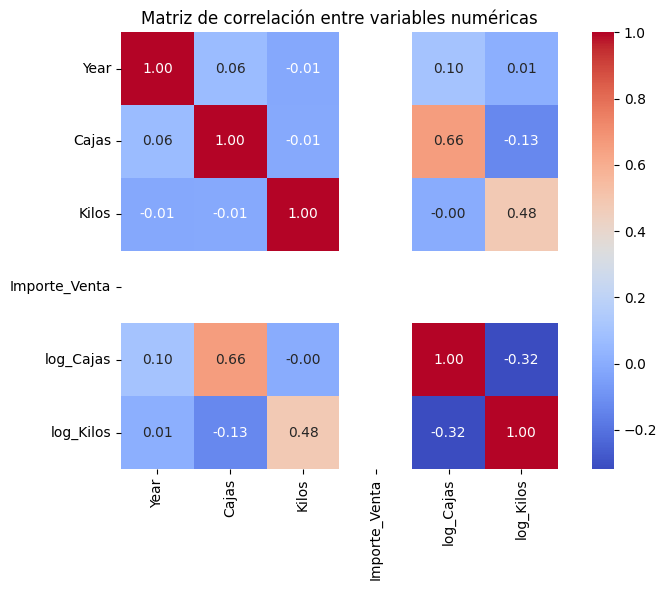

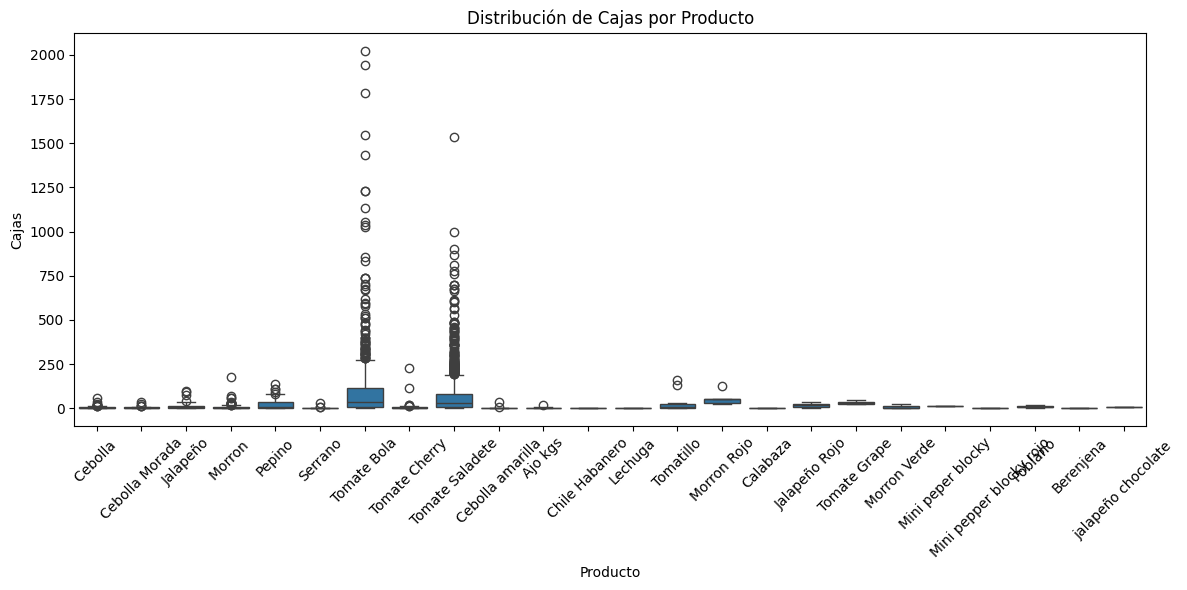

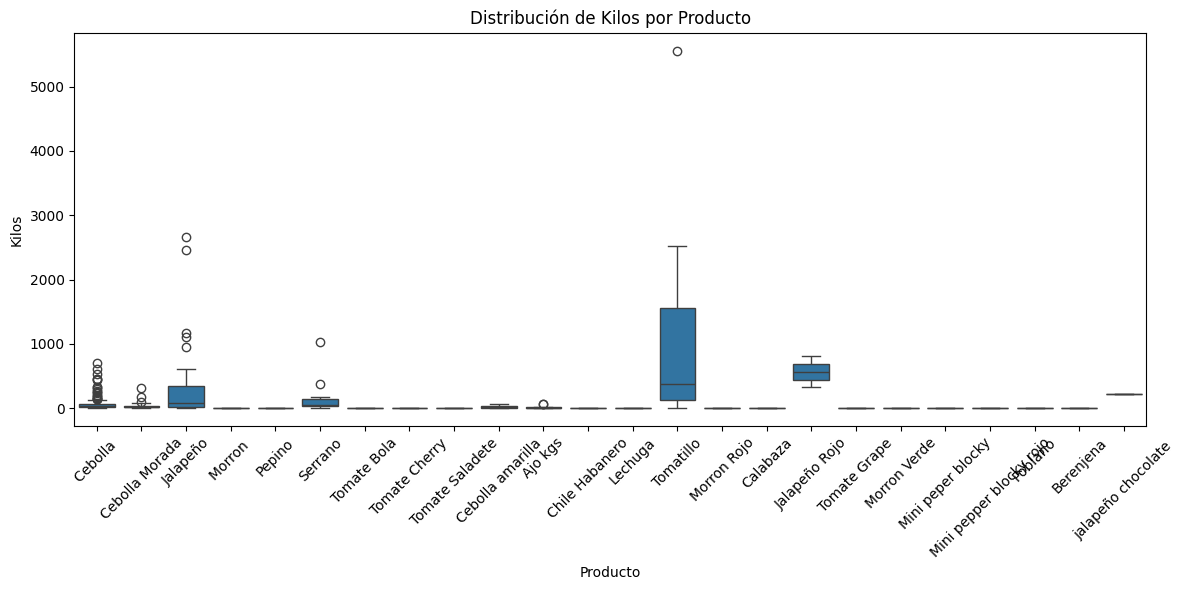

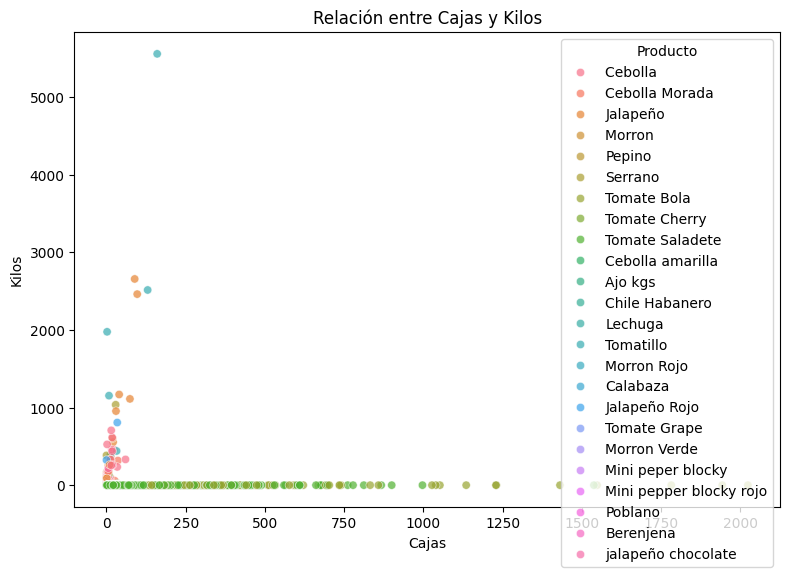

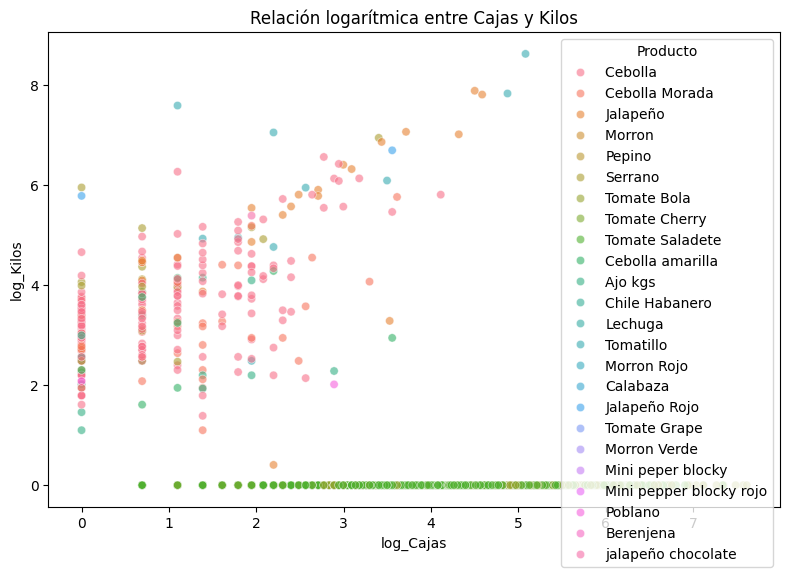

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# carga de datos
df = pd.read_csv("/content/merma_bod_combinado_2022-2024.csv") #bodega

df['Cajas'] = df['Cajas'].fillna(0)
df['Kilos'] = df['Kilos'].fillna(0)

df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución original
sns.histplot(df['Cajas'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución Original de Cajas')

sns.histplot(df['Kilos'], bins=50, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución Original de Kilos')

# Distribución transformada (log)
sns.histplot(df['log_Cajas'], bins=50, kde=True, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Distribución Logarítmica de Cajas')

sns.histplot(df['log_Kilos'], bins=50, kde=True, ax=axes[1, 1], color='indianred')
axes[1, 1].set_title('Distribución Logarítmica de Kilos')

plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener una columna de mes como texto (ej: "Enero", "Febrero", etc.)
# Si tienes la columna "Month" como texto, necesitas convertirla a un número para ordenarlo cronológicamente:
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

# Agrupar datos por año y mes
mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(data=mermas_por_fecha, x='Month', y='Total_Mermas', hue='Year', marker='o')
plt.title('Evolución mensual de las mermas por año')
plt.xlabel('Mes')
plt.ylabel('Número de mermas')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(matriz_corr)

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

#Analisis BI VARIADOO
# Análisis bivariado: Producto vs Cajas (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Cajas')
plt.xticks(rotation=45)
plt.title("Distribución de Cajas por Producto")
plt.tight_layout()
plt.show()

# Producto vs Kilos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Kilos')
plt.xticks(rotation=45)
plt.title("Distribución de Kilos por Producto")
plt.tight_layout()
plt.show()

# Análisis bivariado: Cajas vs Kilos (scatterplot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cajas', y='Kilos', hue='Producto', alpha=0.7)
plt.title("Relación entre Cajas y Kilos")
plt.tight_layout()
plt.show()

# Análisis con variable transformada (logarítmica)
import numpy as np
df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# log_Cajas vs log_Kilos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='log_Cajas', y='log_Kilos', hue='Producto', alpha=0.6)
plt.title("Relación logarítmica entre Cajas y Kilos")
plt.tight_layout()
plt.show()

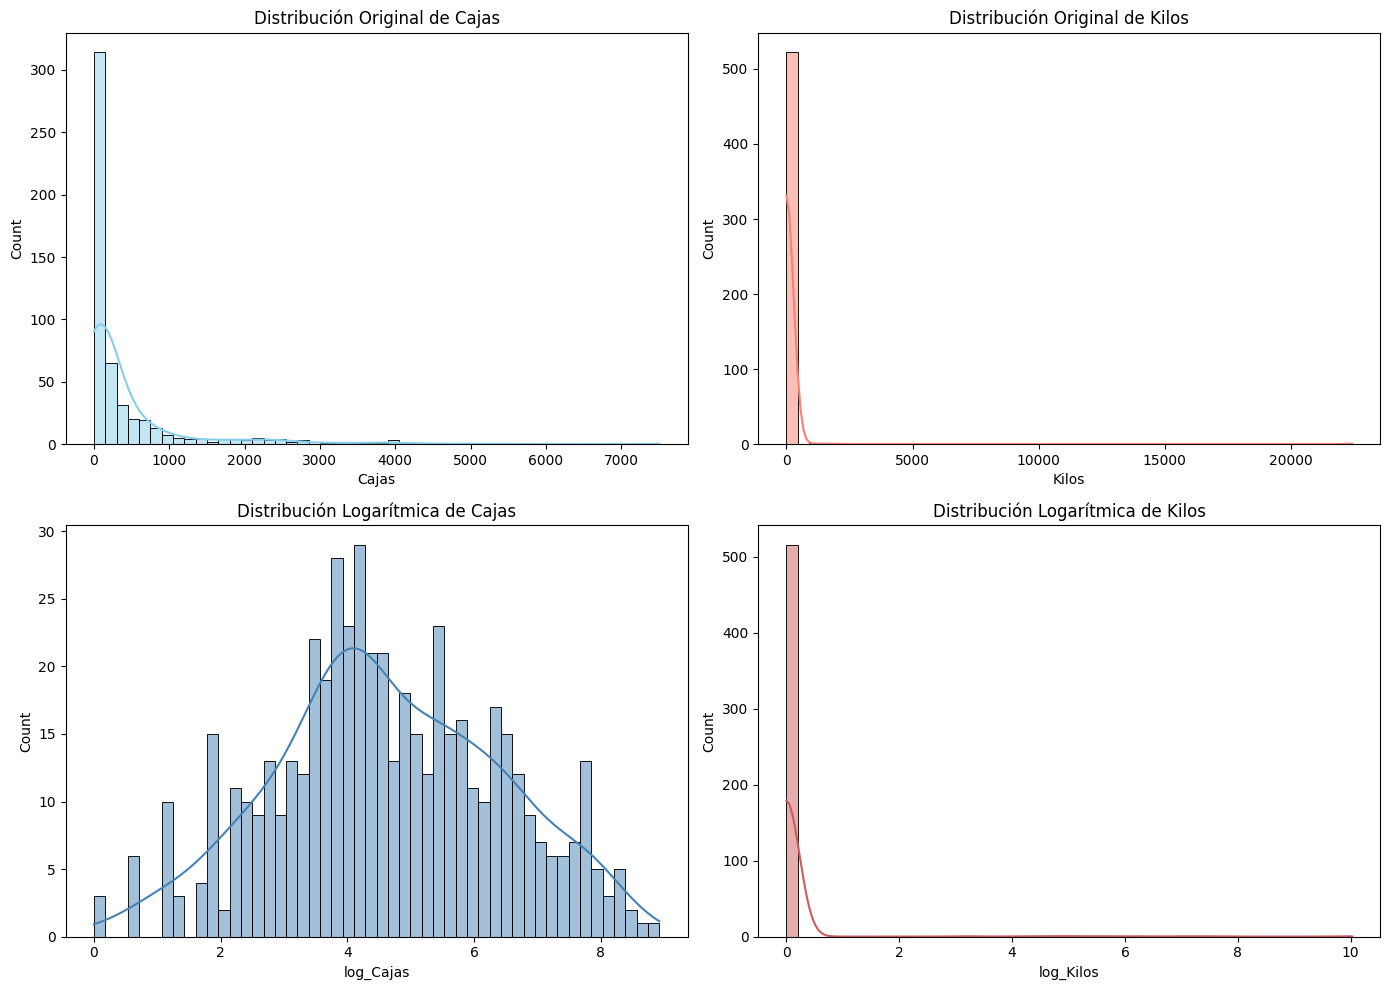

<ipython-input-13-df00f833fe2f>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')


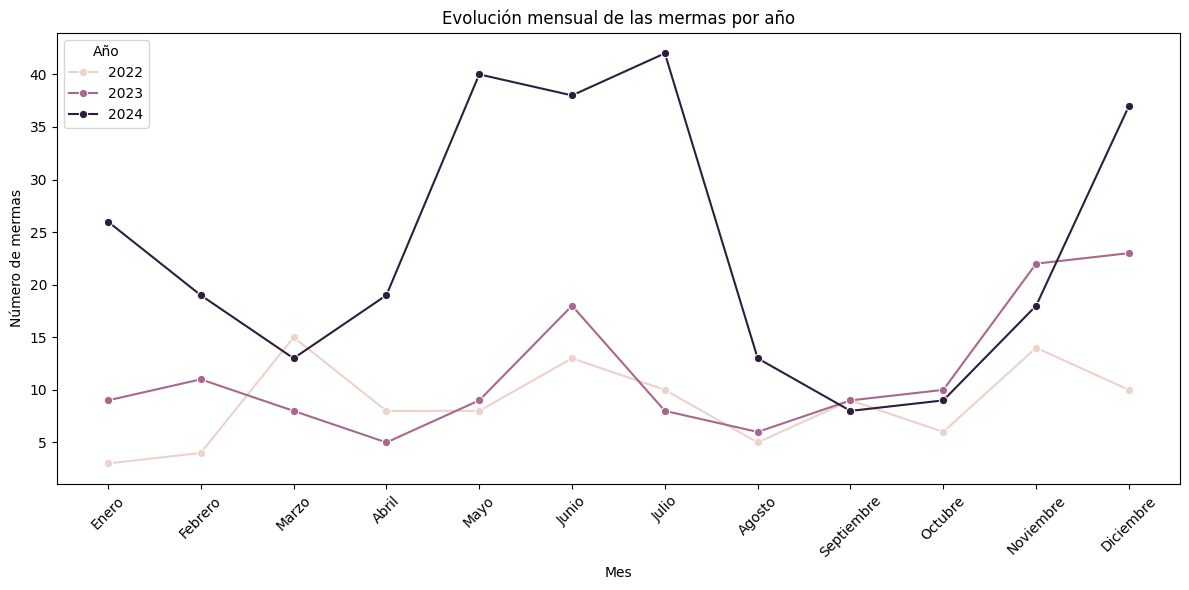

Matriz de correlación:
                   Year  Color     Cajas     Kilos  Importe_Venta  log_Cajas  \
Year           1.000000    NaN  0.074198  0.041922            NaN   0.135805   
Color               NaN    NaN       NaN       NaN            NaN        NaN   
Cajas          0.074198    NaN  1.000000  0.047622            NaN   0.702930   
Kilos          0.041922    NaN  0.047622  1.000000            NaN   0.059266   
Importe_Venta       NaN    NaN       NaN       NaN            NaN        NaN   
log_Cajas      0.135805    NaN  0.702930  0.059266            NaN   1.000000   
log_Kilos      0.060151    NaN -0.019526  0.601190            NaN  -0.106741   

               log_Kilos  
Year            0.060151  
Color                NaN  
Cajas          -0.019526  
Kilos           0.601190  
Importe_Venta        NaN  
log_Cajas      -0.106741  
log_Kilos       1.000000  


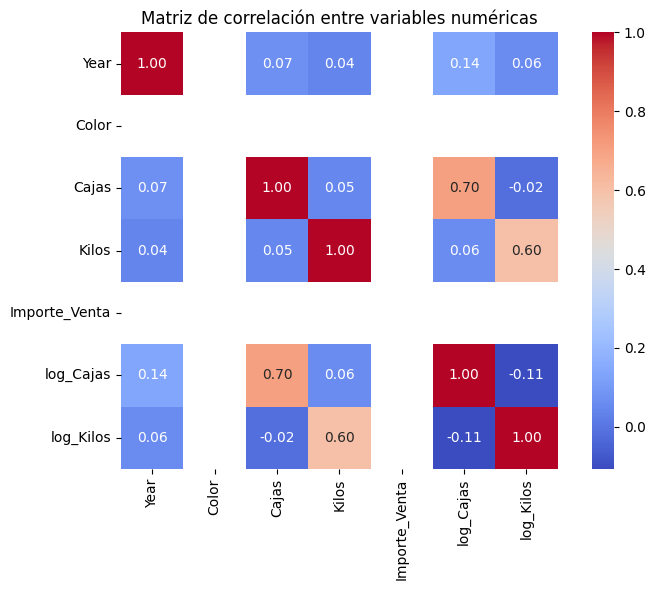

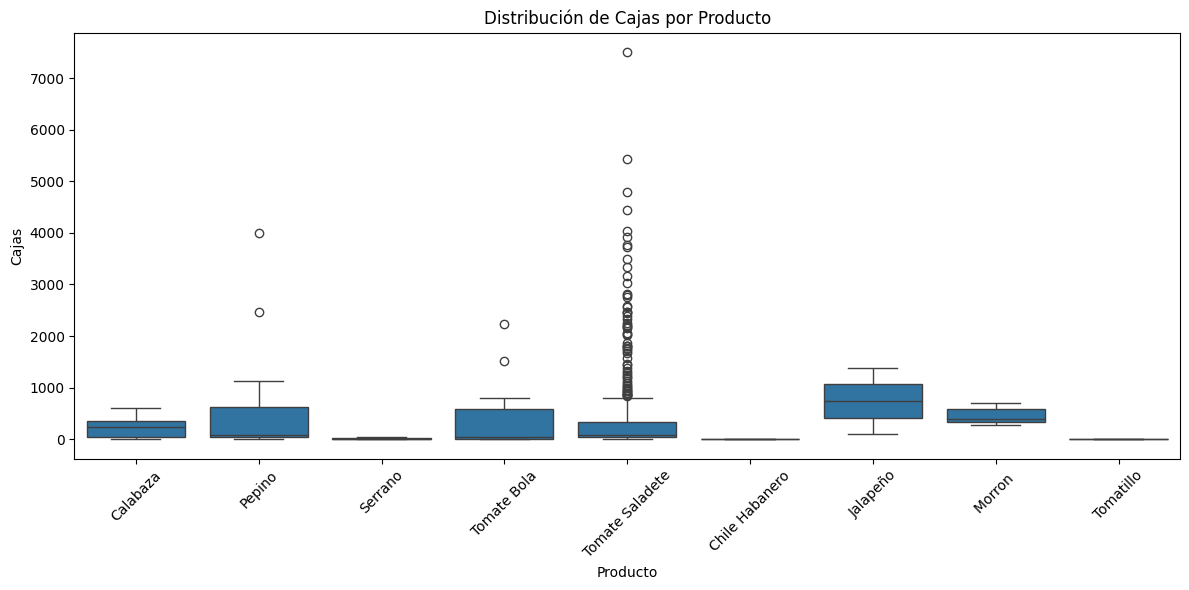

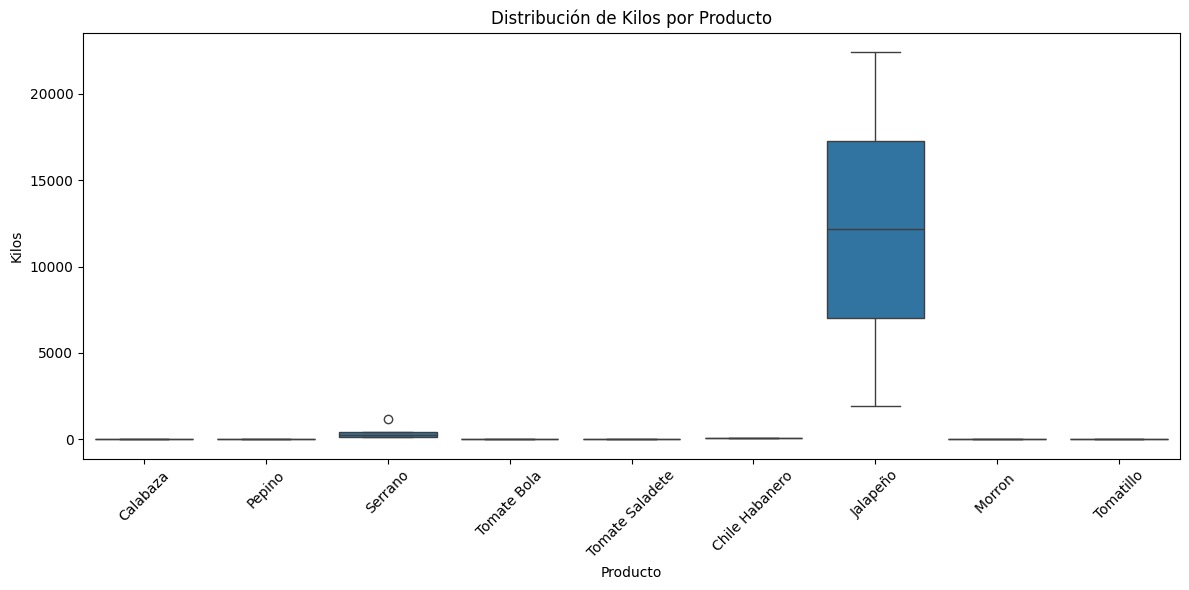

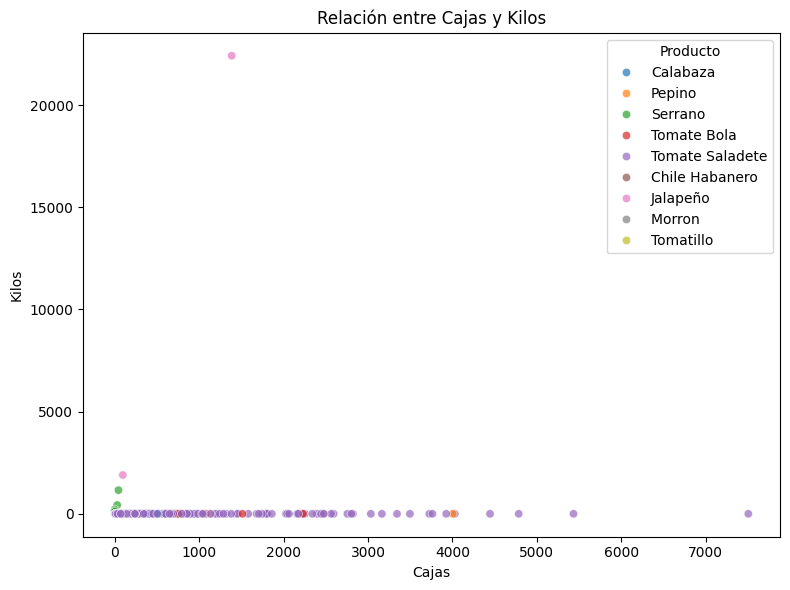

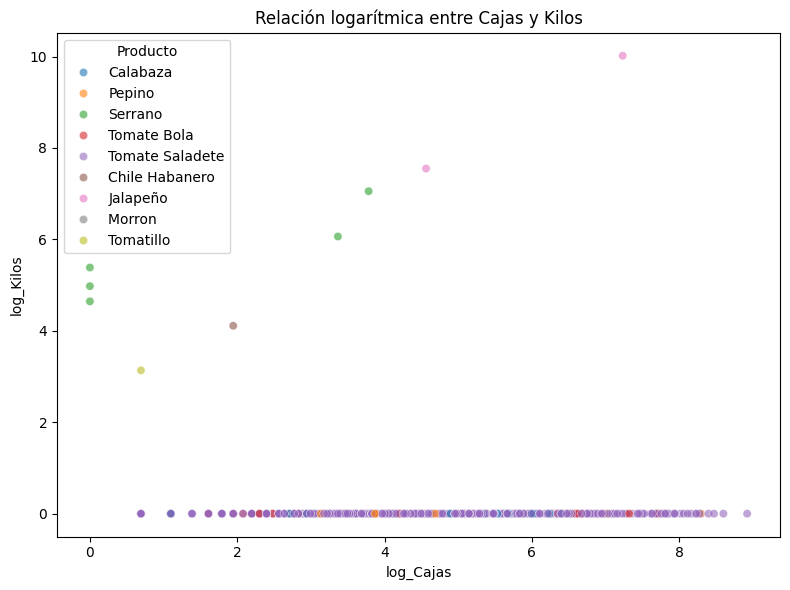

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# carga de datos
df = pd.read_csv("/content/merma_isla_combinado_2022-2024.csv")  # datos isla

df['Cajas'] = df['Cajas'].fillna(0)
df['Kilos'] = df['Kilos'].fillna(0)

df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución original
sns.histplot(df['Cajas'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución Original de Cajas')

sns.histplot(df['Kilos'], bins=50, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución Original de Kilos')

# Distribución transformada (log)
sns.histplot(df['log_Cajas'], bins=50, kde=True, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Distribución Logarítmica de Cajas')

sns.histplot(df['log_Kilos'], bins=50, kde=True, ax=axes[1, 1], color='indianred')
axes[1, 1].set_title('Distribución Logarítmica de Kilos')

plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener una columna de mes como texto (ej: "Enero", "Febrero", etc.)
# Si tienes la columna "Month" como texto, necesitas convertirla a un número para ordenarlo cronológicamente:
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

# Agrupar datos por año y mes
mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(data=mermas_por_fecha, x='Month', y='Total_Mermas', hue='Year', marker='o')
plt.title('Evolución mensual de las mermas por año')
plt.xlabel('Mes')
plt.ylabel('Número de mermas')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(matriz_corr)

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

#Analisis Bi variado

# Análisis bivariado: Producto vs Cajas (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Cajas')
plt.xticks(rotation=45)
plt.title("Distribución de Cajas por Producto")
plt.tight_layout()
plt.show()

# Producto vs Kilos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Kilos')
plt.xticks(rotation=45)
plt.title("Distribución de Kilos por Producto")
plt.tight_layout()
plt.show()

# Análisis bivariado: Cajas vs Kilos (scatterplot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cajas', y='Kilos', hue='Producto', alpha=0.7)
plt.title("Relación entre Cajas y Kilos")
plt.tight_layout()
plt.show()

# Análisis con variable transformada (logarítmica)
import numpy as np
df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# log_Cajas vs log_Kilos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='log_Cajas', y='log_Kilos', hue='Producto', alpha=0.6)
plt.title("Relación logarítmica entre Cajas y Kilos")
plt.tight_layout()
plt.show()